In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_train = pd.read_csv(r"Train.csv")
df_test = pd.read_csv(r"Test.csv")

In [3]:
df_train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [4]:
df_train.shape

(7000, 24)

In [5]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [6]:
df_train.isna().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [7]:
X_train = df_train.drop(columns = ['Employee_ID','Attrition_rate'],axis=1 )
y_train = df_train.pop('Attrition_rate')

In [8]:
X_test = df_test

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


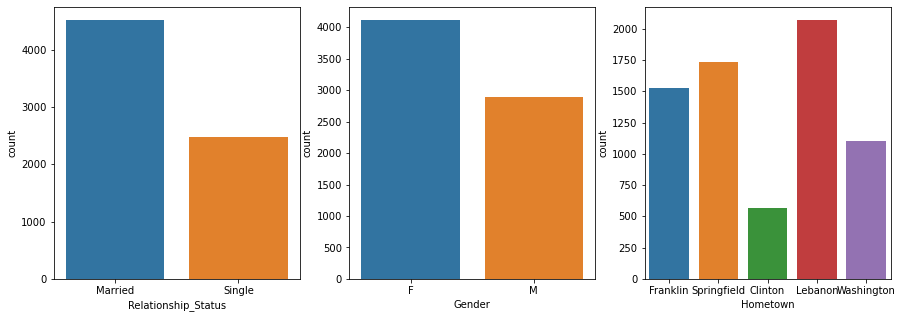

In [9]:
a4_dims = (15,5)
fig,ax =plt.subplots(1,3,figsize=a4_dims)
sns.countplot(df_train.Relationship_Status,ax=ax[0])
sns.countplot(df_train.Gender,ax=ax[1])
sns.countplot(df_train.Hometown,ax=ax[2])
fig.show()


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


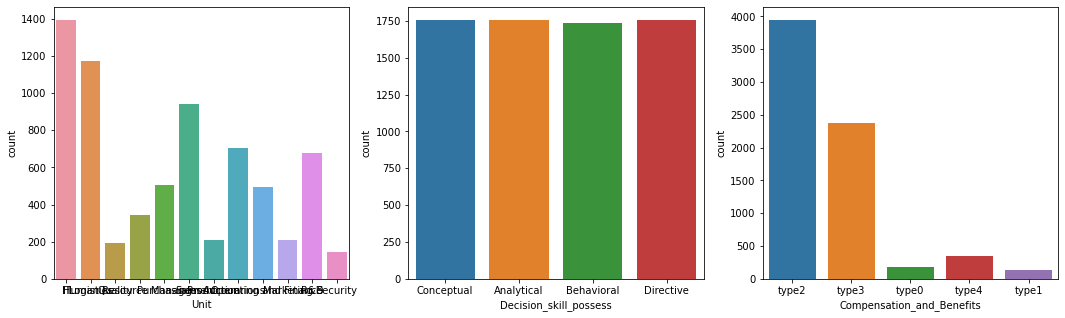

In [10]:
a4_dims = (18,5)
fig,ax =plt.subplots(1,3,figsize=a4_dims)
sns.countplot(df_train.Unit,ax=ax[0])
sns.countplot(df_train.Decision_skill_possess,ax=ax[1])
sns.countplot(df_train.Compensation_and_Benefits,ax=ax[2])
fig.show()

In [11]:
df_train.describe(include=['object'])

,Employee_ID,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
count,7000,7000,7000,7000,7000,7000,7000
unique,7000,2,2,5,12,4,5
top,EID_22843,F,Married,Lebanon,IT,Conceptual,type2
freq,1,4114,4520,2070,1394,1756,3945


In [12]:
objectColumns=X_train.describe(include=['object']).columns.values

In [13]:
objectColumns

array(['Gender', 'Relationship_Status', 'Hometown', 'Unit',
       'Decision_skill_possess', 'Compensation_and_Benefits'],
      dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
for col in objectColumns: 
    encoder.fit(X_train[col].append(X_test[col]).values)
    X_train[col] = encoder.transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])
    print("Unique classes for {} are:  {}\n".format(col,encoder.classes_ ))

Unique classes for Gender are:  ['F' 'M']

Unique classes for Relationship_Status are:  ['Married' 'Single']

Unique classes for Hometown are:  ['Clinton' 'Franklin' 'Lebanon' 'Springfield' 'Washington']

Unique classes for Unit are:  ['Accounting and Finance' 'Human Resource Management' 'IT' 'Logistics'
 'Marketing' 'Operarions' 'Production' 'Purchasing' 'Quality' 'R&D'
 'Sales' 'Security']

Unique classes for Decision_skill_possess are:  ['Analytical' 'Behavioral' 'Conceptual' 'Directive']

Unique classes for Compensation_and_Benefits are:  ['type0' 'type1' 'type2' 'type3' 'type4']



In [16]:
X_train.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,0,42.0,4,0,1,2,2,4.0,4,33,...,7.0,2,3.0,4,0.7516,1.8688,2.0,4,5,3
1,1,24.0,3,1,3,3,0,5.0,4,36,...,6.0,2,4.0,3,-0.9612,-0.4537,2.0,3,5,3
2,0,58.0,3,0,0,8,2,27.0,3,51,...,8.0,2,1.0,4,-0.9612,-0.4537,3.0,3,8,3
3,0,26.0,3,1,2,1,1,4.0,3,56,...,8.0,2,1.0,3,-1.8176,-0.4537,NaN,3,7,3
4,0,31.0,1,0,3,3,2,5.0,4,62,...,2.0,3,3.0,1,0.7516,-0.4537,2.0,2,8,2


In [17]:
X_test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,0,32.0,5,1,3,9,2,7.0,4,...,4.0,2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,1,65.0,2,1,2,2,3,41.0,2,...,1.0,2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,1,52.0,3,0,3,10,3,21.0,3,...,8.0,3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,1,50.0,5,1,4,4,0,11.0,4,...,2.0,0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,0,44.0,3,0,1,9,2,12.0,4,...,2.0,2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [18]:
X_train.describe()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
count,7000.000000,6588.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,6856.000000,7000.000000,7000.000000,...,6991.000000,7000.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000
mean,0.412286,39.622799,3.187857,0.354286,2.185000,4.928714,1.501000,13.385064,2.367143,47.064286,...,6.006294,2.368714,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000
std,0.492281,13.606920,1.065102,0.478330,1.177456,3.357991,1.119135,10.364188,1.149395,15.761406,...,2.058435,0.729372,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319
min,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,...,1.000000,0.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000
25%,0.000000,27.000000,3.000000,0.000000,1.000000,2.000000,0.000000,5.000000,1.000000,33.000000,...,5.000000,2.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000
50%,0.000000,37.000000,3.000000,0.000000,2.000000,4.000000,2.000000,10.000000,2.000000,47.000000,...,6.000000,2.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000
75%,1.000000,52.000000,4.000000,1.000000,3.000000,9.000000,3.000000,21.000000,3.000000,61.000000,...,8.000000,3.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000
max,1.000000,65.000000,5.000000,1.000000,4.000000,11.000000,3.000000,43.000000,4.000000,74.000000,...,10.000000,4.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000


In [19]:
X_train.isna().sum()

Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [20]:
X_train.Work_Life_balance.median()

2.0

In [21]:
#Replace nan values of columns
X_train['Age'] = X_train['Age'].fillna(37)
X_test['Age'] = X_test['Age'].fillna(37)
#Time_of_service
X_train['Time_of_service'] = X_train['Time_of_service'].fillna(10)
X_test['Time_of_service'] = X_test['Time_of_service'].fillna(10)
#Pay_Scale
X_train['Pay_Scale'] = X_train['Pay_Scale'].fillna(6)
X_test['Pay_Scale'] = X_test['Pay_Scale'].fillna(6)
#Work_Life_balance
X_train['Work_Life_balance'] = X_train['Work_Life_balance'].fillna(2)
X_test['Work_Life_balance'] = X_test['Work_Life_balance'].fillna(2)
#VAR2
X_train['VAR2'] = X_train['VAR2'].fillna(-0.008126)
X_test['VAR2'] = X_test['VAR2'].fillna(-0.008126)
#VAR4
X_train['VAR4'] = X_train['VAR4'].fillna(2)
X_test['VAR4'] = X_test['VAR4'].fillna(2)


In [22]:
corrdf = pd.concat([X_train,y_train],axis=1)

In [23]:
corrdf.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,0,42.0,4,0,1,2,2,4.0,4,33,...,2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,1,24.0,3,1,3,3,0,5.0,4,36,...,2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,0,58.0,3,0,0,8,2,27.0,3,51,...,2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,0,26.0,3,1,2,1,1,4.0,3,56,...,2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,0,31.0,1,0,3,3,2,5.0,4,62,...,3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


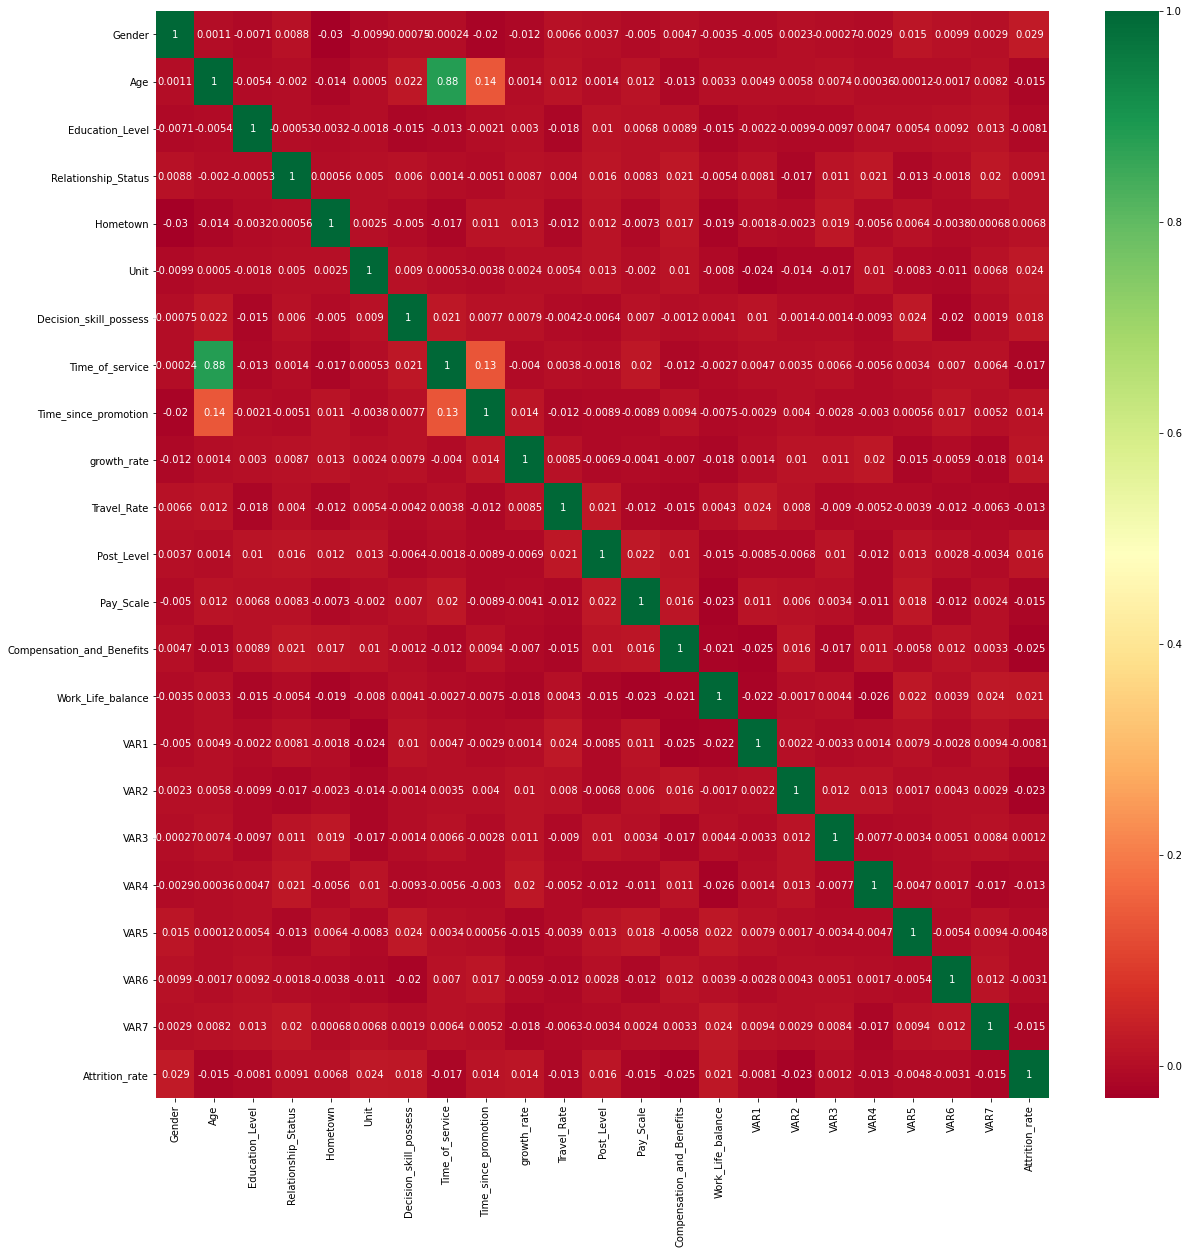

In [24]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = corrdf.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrdf[top_corr_features].corr(),annot=True,cmap="RdYlGn")

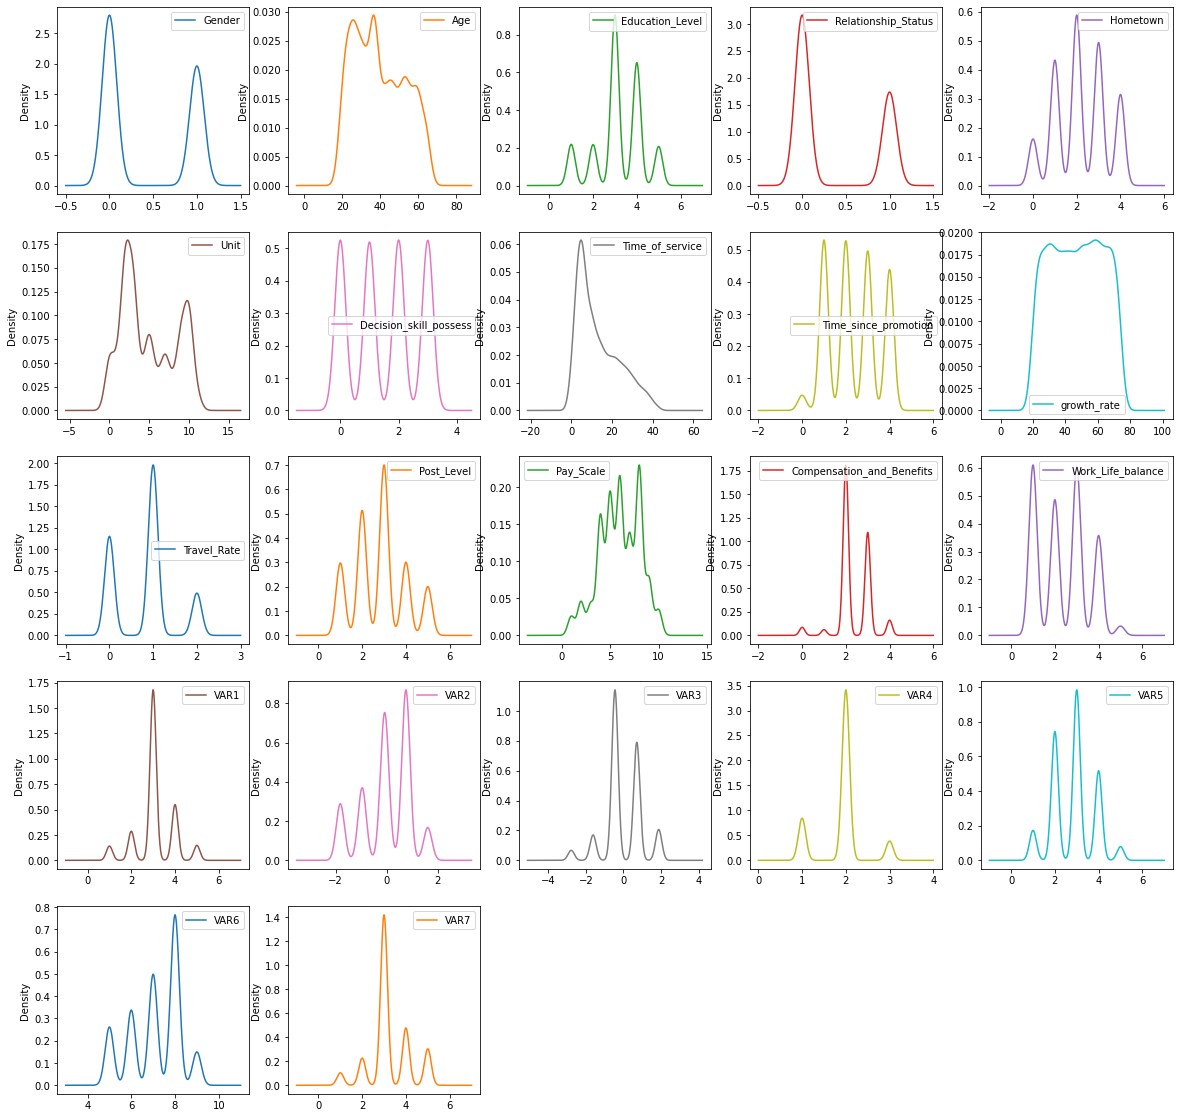

In [25]:
#Visualizing attributes
plt.rcParams["figure.figsize"]=20,20
X_train.plot(kind='density', subplots=True, layout=(5,5), sharex=False)

plt.show()


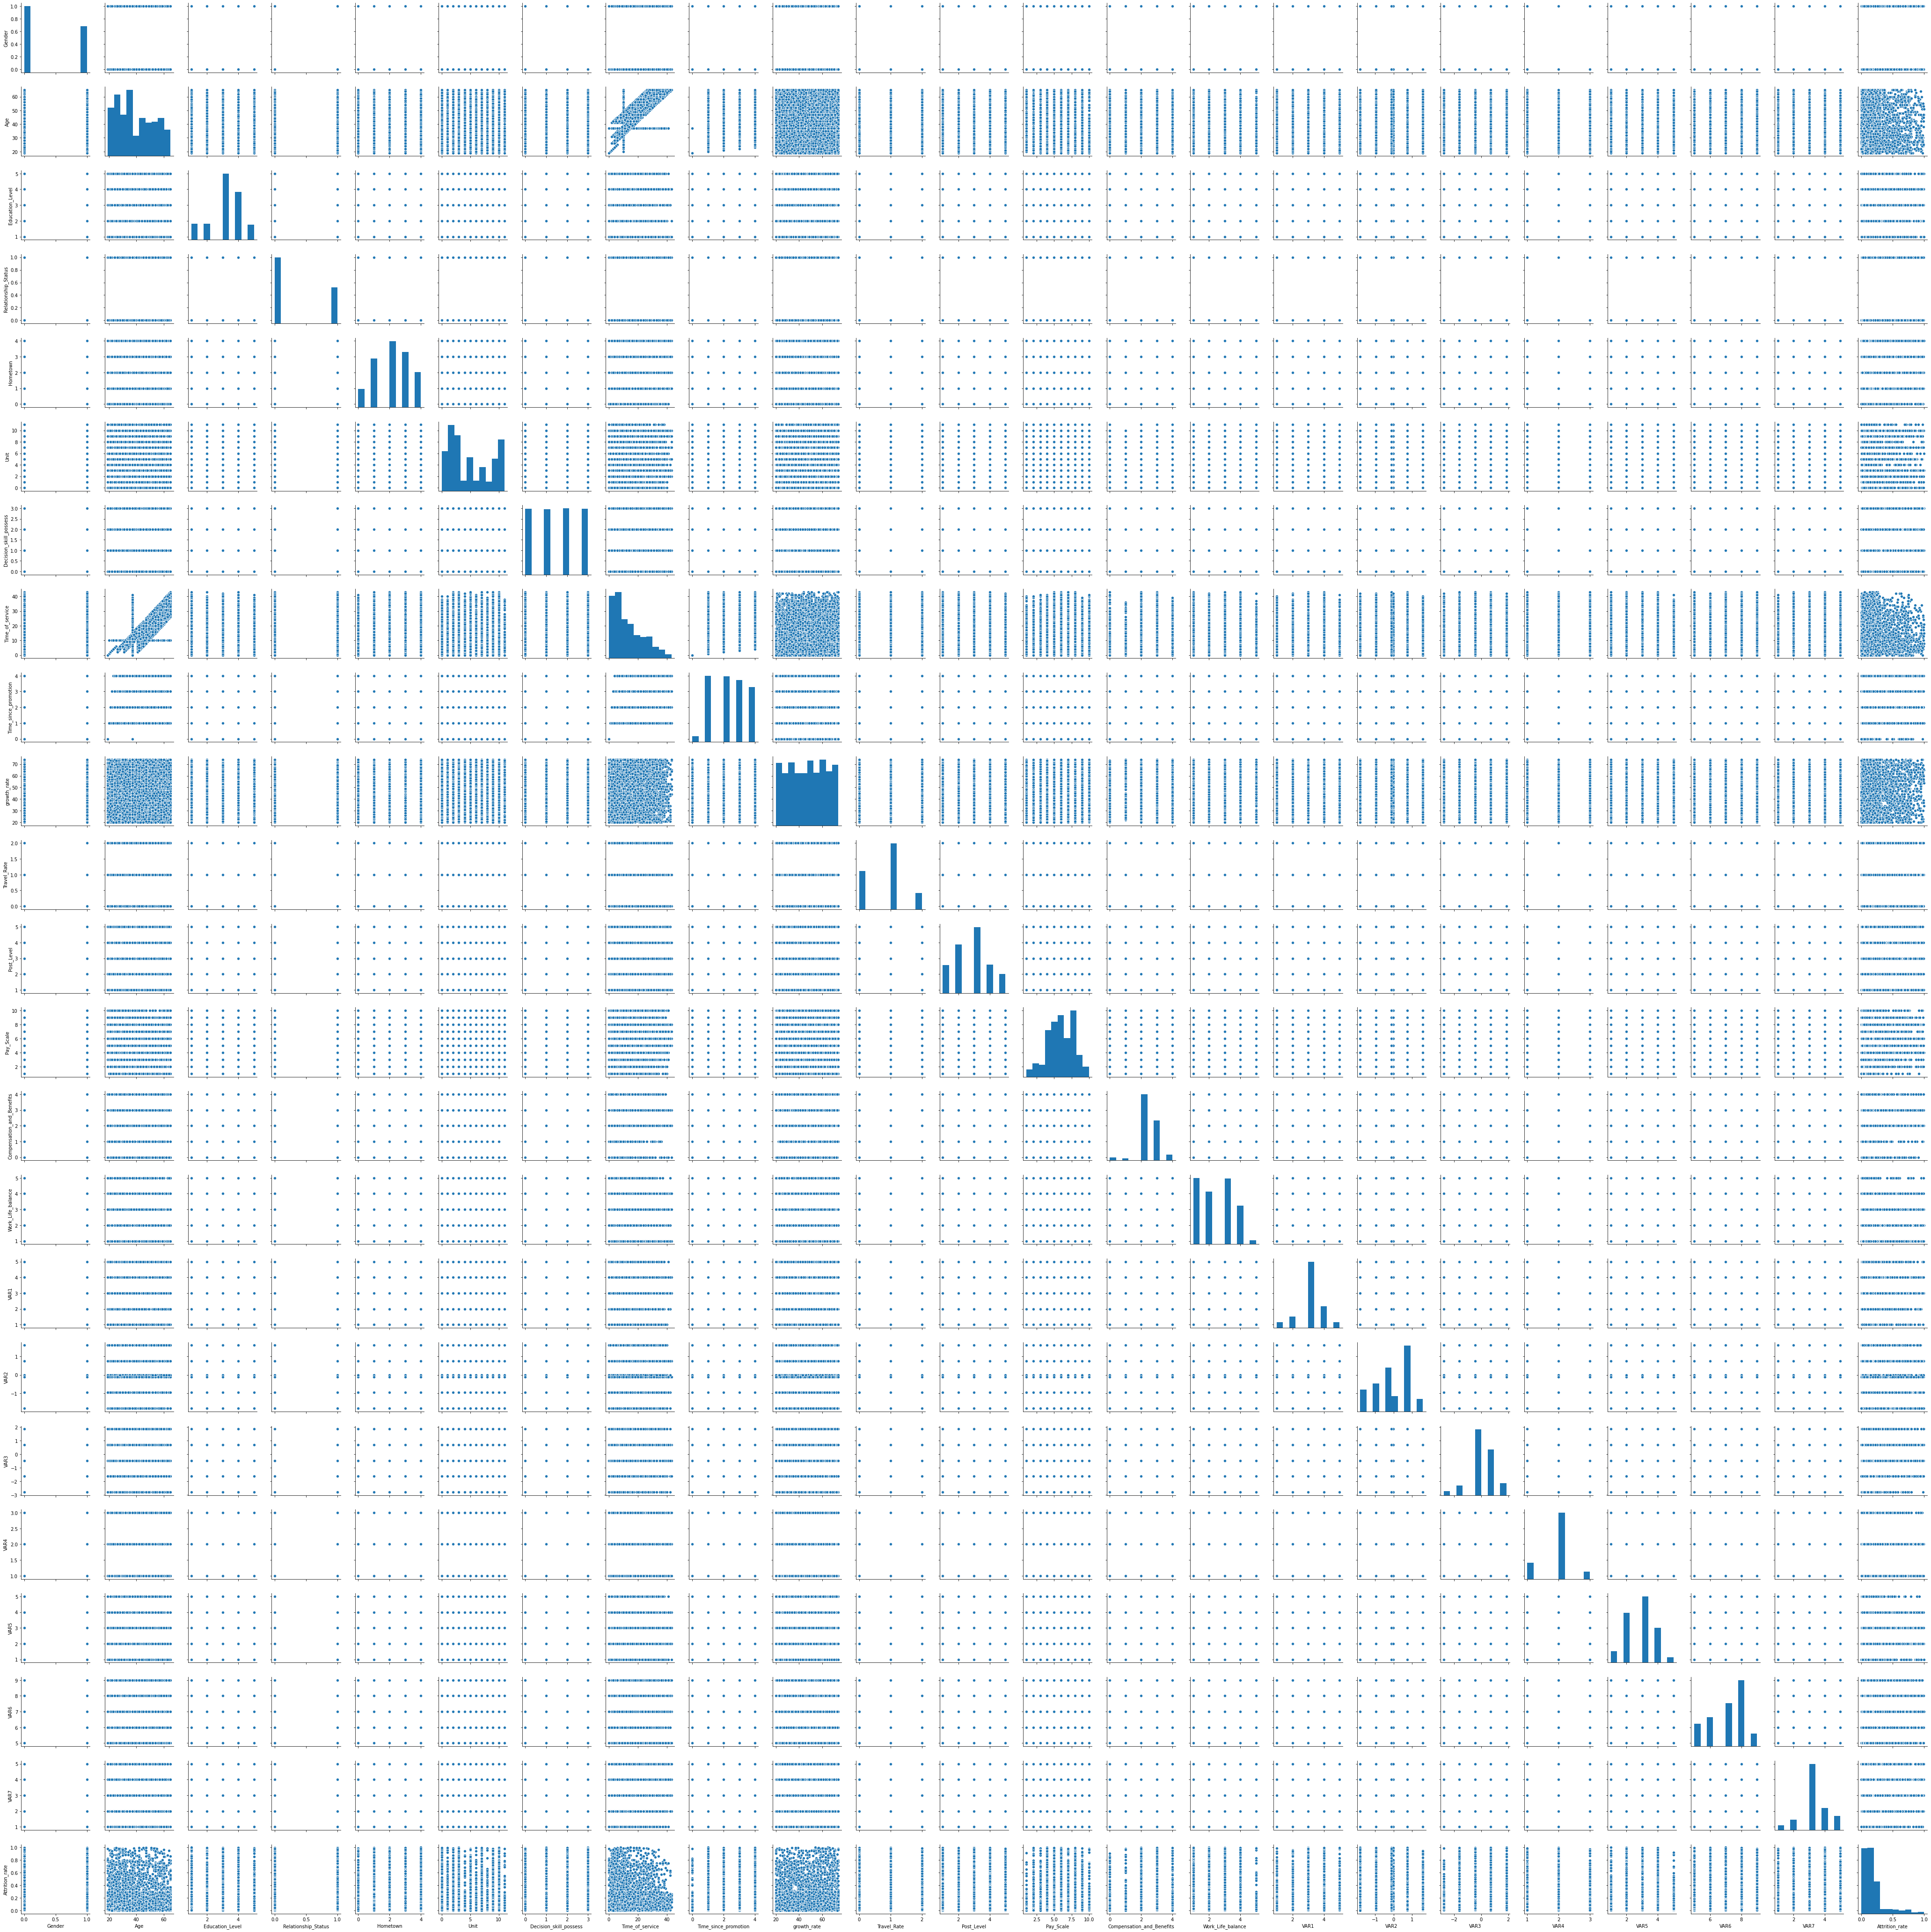

In [26]:
#Plot a pairplot
sns.pairplot(pd.concat([X_train,y_train],axis=1))

In [29]:
import statsmodels.api as sm
linear_model=sm.OLS(y_train,X_train)
result=linear_model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:         Attrition_rate   R-squared (uncentered):                   0.509
Model:                            OLS   Adj. R-squared (uncentered):              0.507
Method:                 Least Squares   F-statistic:                              328.5
Date:                Tue, 30 Jun 2020   Prob (F-statistic):                        0.00
Time:                        07:14:29   Log-Likelihood:                          1844.5
No. Observations:                7000   AIC:                                     -3645.
Df Residuals:                    6978   BIC:                                     -3494.
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [30]:
#we need atleat 98% information to be reatined, and accordingly have
#the extracted features of highest variance
from sklearn.decomposition import PCA
pcamodel=PCA(0.99,svd_solver='full')
pcamodel.fit(X_train)

PCA(n_components=0.99, svd_solver='full')

In [31]:
# these components are orthogonal to each other and are independent to each other
#these features are of highest variance and are itself calculating infogain
pcamodel.n_components_

13

In [32]:
pcamodel.explained_variance_ratio_

array([0.47306411, 0.44437   , 0.0279643 , 0.02017343, 0.00757068,
       0.00251109, 0.00244826, 0.00242018, 0.00230009, 0.00225599,
       0.00221685, 0.00202286, 0.00174133])

In [33]:
compactedDerivedFeatures_train=pd.DataFrame(pcamodel.transform(X_train))

In [34]:
compactedDerivedFeatures_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03
mean,-1.664193e-15,1.673836e-15,3.000901e-15,5.558728e-16,5.922247e-17,-5.132402e-17,-3.357949e-16,-8.548717e-17,-2.128932e-16,-4.463097e-17,-1.603321e-16,-1.047178e-16,-3.743038e-18
std,1.626242e+01,1.576150e+01,3.953912e+00,3.358265e+00,2.057276e+00,1.184829e+00,1.169914e+00,1.163185e+00,1.133959e+00,1.123037e+00,1.113252e+00,1.063426e+00,9.866563e-01
min,-2.463820e+01,-2.726902e+01,-1.808649e+01,-4.976444e+00,-4.164404e+00,-3.130741e+00,-2.803468e+00,-3.033716e+00,-3.243418e+00,-2.996634e+00,-3.121892e+00,-2.475106e+00,-2.389234e+00
25%,-1.418876e+01,-1.377238e+01,-2.177796e+00,-2.922258e+00,-1.948172e+00,-8.742886e-01,-8.770176e-01,-8.450420e-01,-8.781667e-01,-8.328219e-01,-8.275286e-01,-7.655603e-01,-7.166231e-01
50%,-2.974531e+00,-1.022207e-01,4.793311e-01,-9.313924e-01,-3.758440e-03,-9.572247e-03,-1.926564e-01,-3.195997e-02,1.891619e-02,-3.737320e-02,-3.269243e-03,2.538787e-02,2.658544e-01
75%,1.281337e+01,1.392529e+01,2.280481e+00,4.041236e+00,1.122932e+00,8.578688e-01,8.636798e-01,7.947347e-01,8.652344e-01,8.274871e-01,8.001874e-01,4.522717e-01,5.118878e-01
max,3.825776e+01,2.730718e+01,2.366915e+01,6.110744e+00,5.307584e+00,3.239291e+00,3.086575e+00,3.641377e+00,3.756634e+00,3.491719e+00,3.326374e+00,2.723752e+00,3.215575e+00


In [35]:
compactedDerivedFeatures_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-3.417407,14.069001,-9.011928,-2.947571,-1.093927,1.648889,1.688325,-1.488702,-1.744642,0.150307,0.786237,-0.876018,-2.103099
1,-17.241642,11.238568,2.595171,-1.918511,0.046864,-0.695612,1.381537,-0.455640,-1.115863,0.630283,2.993331,-0.023023,0.587543
2,23.009549,-4.156669,-0.138946,3.057918,-1.965264,1.923144,-1.000819,-0.181266,-0.947986,-1.195217,-1.206945,0.293001,0.432777
3,-16.438085,-8.775421,0.703136,-3.922010,-2.026877,-0.298089,-0.173269,0.125970,-0.983417,-1.231465,-0.021572,0.325473,0.671125
4,-11.898867,-14.831914,-1.556503,-1.916611,4.019117,-0.826240,-0.857285,-0.824527,-1.215692,1.303461,0.134565,2.114153,0.604913


In [36]:
compactedDerivedFeatures_test = pd.DataFrame(pcamodel.transform(X_test.drop('Employee_ID',axis=1)))

# Lets check the correlation between extracted features and output var

In [37]:
compactedDerivedFeaturesAndTarget_train = pd.concat([compactedDerivedFeatures_train, y_train], axis=1)

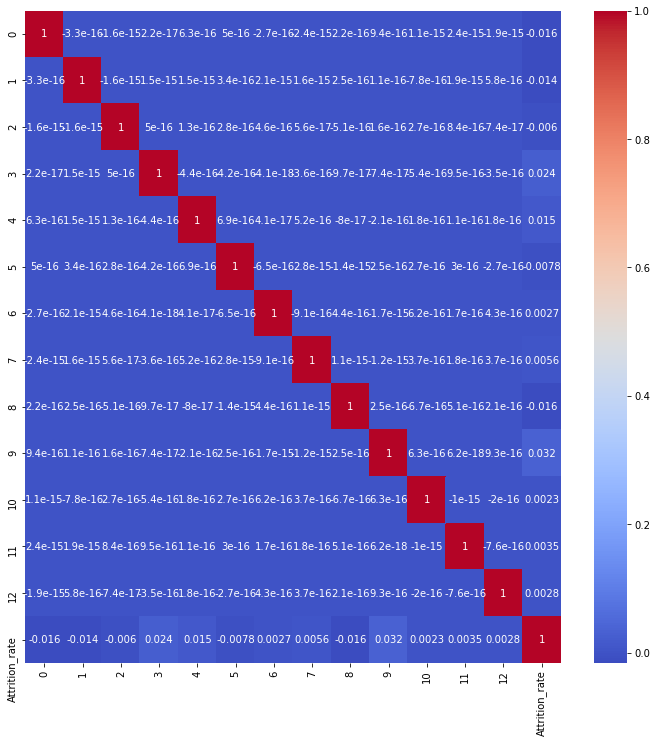

In [38]:
plt.figure(figsize=(12,12))
corrMap=compactedDerivedFeaturesAndTarget_train.corr()
sns.heatmap(corrMap,annot=True,cmap='coolwarm')

# LINEAR REGRESSION

In [39]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(compactedDerivedFeatures_train,y_train)

LinearRegression()

In [40]:
predictions_lm = lm.predict(compactedDerivedFeatures_train)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
mse_score = mean_squared_error(y_train, predictions_lm)
print("MSE is:",mse_score)

print("R2 score is : ",r2_score(y_train, predictions_lm) )

MSE is: 0.03440637875474995
R2 score is :  0.0026948991315667303


In [42]:
predictions_lm_test = lm.predict(compactedDerivedFeatures_test)

In [43]:
#Compiling the prediction to a csv file

submit = pd.DataFrame()

submit['Employee_ID']= X_test.Employee_ID

submit['Attrition_rate'] = pd.DataFrame(predictions_lm_test)

submit.to_csv('Emp_attrition_lm.csv', index=False)